<a href="https://colab.research.google.com/github/kaueag/bibliotecapandas/blob/main/C%C3%B3pia_git_de_Desafio_5_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-profiling==3.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.0/268.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 13.6 M

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


# **Load Data**


In [ ]:
import io
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [ ]:
df = pd.read_csv('data.csv', encoding='latin-1')
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# **Exploração inicial de dados**

In [ ]:
df.info()
#Percebemos que já existem várias células vazias e o InvoiceDate não está com o type correto - corrigiremos mais tarde. Outras colunas também precisarão de ajustes de type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()
#Quantidade com valores negativos, precisarão ser filtrados, assim como UnitPrice. CustomerID é irrelevante nessa análise por se tratar apenas de IDs de identificação.

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# **Verificação de nulos, valores negativos e duplicatas**

In [ ]:
df.isna().sum()
#Como podemos ver, algumas linhas de description estão vazias e muitas de CustomerID também. Vamos retirar na próxima linha de código.

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#Remoção das linhas nulas e nova tabela
df=df.dropna()
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
#Verificar se há linhas duplicadas
df.duplicated().sum().any()

True

In [ ]:
#Removendo linhas duplicadas e fazendo o display. Aproximadamente 5 mil linhas duplicadas removidas.
df = df.drop_duplicates()
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df[df['CustomerID'] == 12347]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,2011-12-07 15:52:00,0.85,12347,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,2011-12-07 15:52:00,1.95,12347,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,2011-12-07 15:52:00,0.83,12347,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,2011-12-07 15:52:00,0.42,12347,Iceland


In [ ]:
#Com o tratamento feito, as unidades negativas já foram eliminadas. Mesmo assim, filtraremos somente acima de 0, afinal, o valor também não pode ser 0.
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
#Ainda existem quantidades negativas, teremos que filtrar.
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
#Filtragem efetivada e retiramos 8872 linhas.
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# **Correção dos Types das colunas**

In [ ]:
#Corrigindo a coluna de data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].dtype

dtype('<M8[ns]')

In [ ]:
#Mudando CustomerID para int
df['CustomerID'] = df['CustomerID'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


# **EDA**

In [ ]:
#Com todo tratamento feito, podemos fazer um novo describe para ter uma noção maior dos dados. Podemos ver que existem outliers tanto na quantidade quanto no preço.
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
#Puxando um profile report para ver mais algumas relações entre os dados.
#É interessante notar que há uma correlação negativa pela variável de Spearman entre Quantidade e Preço, ou seja, quanto mais se compra, menores tendem ser os preços.
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Tratamento de outliers**

In [ ]:
#Retirando colunas que não importam para ver os outliers
cols2drop = ['StockCode', 'Description', 'InvoiceDate', 'Country', 'CustomerID', 'InvoiceNo']
df_box = df.drop(columns = cols2drop)

<AxesSubplot:>

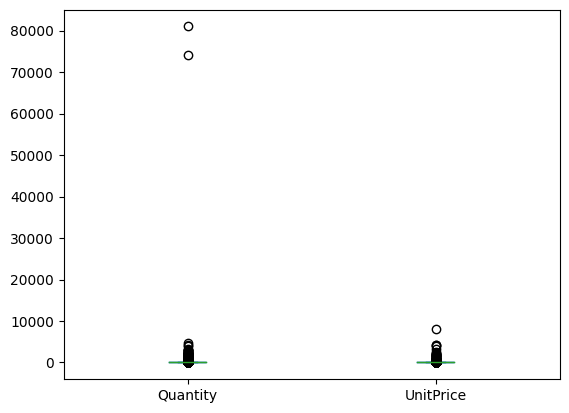

In [ ]:
#No desafio é pedido para desconsiderar outliers acima de 10 mil para quantidade e 5 mil para preço unitário. No entanto, podemos ver que nenhuma Quantity chega a 10 mil.
#Dito isso, ainda acho relevante retirarmos os dois valores que se aproximam de 10 mil, tanto o de 7 mil e pouco e o de 8 mil.

df_box.plot.box()

<AxesSubplot:>

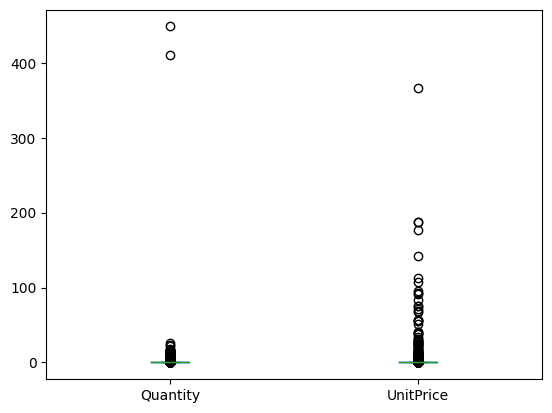

In [ ]:
#Podemos também verificar melhor aplicando a Scale do sklearn. Acredito que há pelo menos 3 outliers que podemos retirar, 2 de Quantity e 1 de UnitPrice.
df_box.apply(scale).plot.box()

In [ ]:
#Verificando quais linhas possuem os dois valores a serem retirados
df['Quantity'].sort_values(ascending=False)


540421    80995
61619     74215
421632     4800
206121     4300
97432      3906
          ...  
171584        1
74255         1
171583        1
74259         1
261831        1
Name: Quantity, Length: 392692, dtype: int64

In [ ]:
#Verificando a linha que possui o valor acima de 5 mil
df['UnitPrice'].sort_values(ascending=False)

173382    8142.750
422376    4161.060
422351    4161.060
406406    3949.320
374542    3155.950
            ...   
229499       0.040
279045       0.001
359871       0.001
157195       0.001
361741       0.001
Name: UnitPrice, Length: 392692, dtype: float64

In [ ]:
#Retirando as linhas
indices_outliers = [540421, 61619, 173382]
df_sem_outliers = df.drop(indices_outliers)

In [ ]:
#Aplicando describe para verificar se tudo deu certo
df_sem_outliers.describe()

,Quantity,UnitPrice,CustomerID
count,392689.000000,392689.000000,392689.000000
mean,12.724550,3.105194,15287.846520
std,43.083696,18.055047,1713.538259
min,1.000000,0.001000,12347.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,4800.000000,4161.060000,18287.000000


# **Adicionando coluna de preço total**

In [ ]:
df_sem_outliers['TotalPrice'] = df['Quantity'] * df['UnitPrice']
display(df_sem_outliers)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,NaN
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,NaN


# Verificando última data de compra com max()


In [ ]:
#Verificando última data de compra
data_final = df_sem_outliers['InvoiceDate'].max()
df_sem_outliers['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

# **Gráficos de top 10 e vendas em geral**

In [ ]:
#Top 10 países com maior valor em vendas (TotalPrice, que é a quantidade * unitprice)
top_countries = df_sem_outliers.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
top10_countries = top_countries.head(10)

display(top10_countries)

Country
United Kingdom    7031228.694
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Australia          138453.810
Spain               61558.560
Switzerland         56443.950
Belgium             41196.340
Sweden              38367.830
Name: TotalPrice, dtype: float64

## Top 10 países em vendas

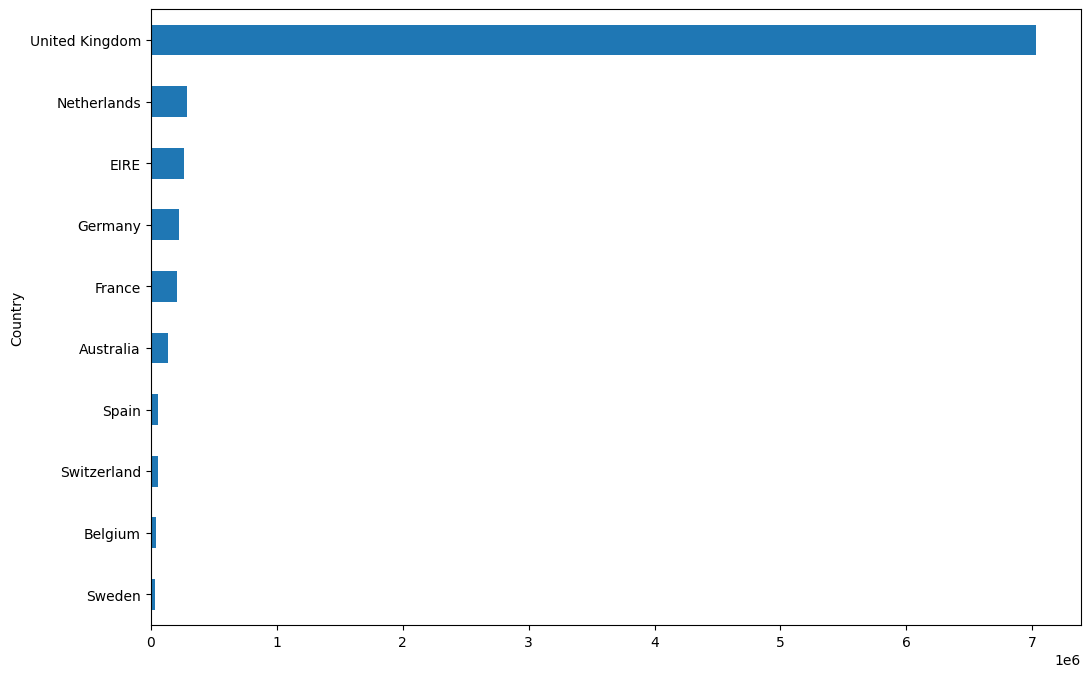

In [ ]:
ax = top10_countries.plot.barh(figsize=(12, 8))
ax.invert_yaxis()
plt.show()

## **Top 10 produtos mais vendidos por quantidade**

In [ ]:
top_prod = df_sem_outliers.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)
top10_prod = top_prod.head(10)

display(top10_prod)

StockCode
84077     54319
22197     49160
85099B    46078
85123A    36763
84879     35263
21212     33670
23084     27153
22492     26076
22616     25329
21977     24230
Name: Quantity, dtype: int64

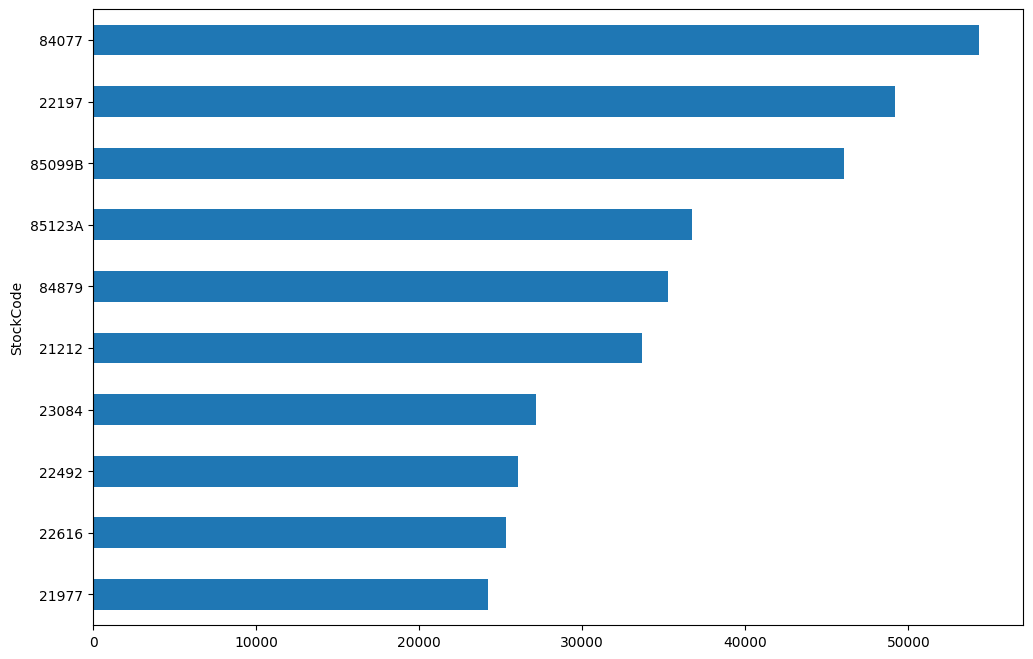

In [ ]:
ax = top10_prod.plot.barh(figsize=(12, 8))
ax.invert_yaxis()
plt.show()

## Vendas totais por cada mês

In [ ]:
df_sem_outliers['InvoiceDate'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 392689, dtype: int64

In [ ]:
vendas_mes = df_sem_outliers.groupby(df_sem_outliers['InvoiceDate'].dt.month)['TotalPrice'].sum().sort_values(ascending=False)

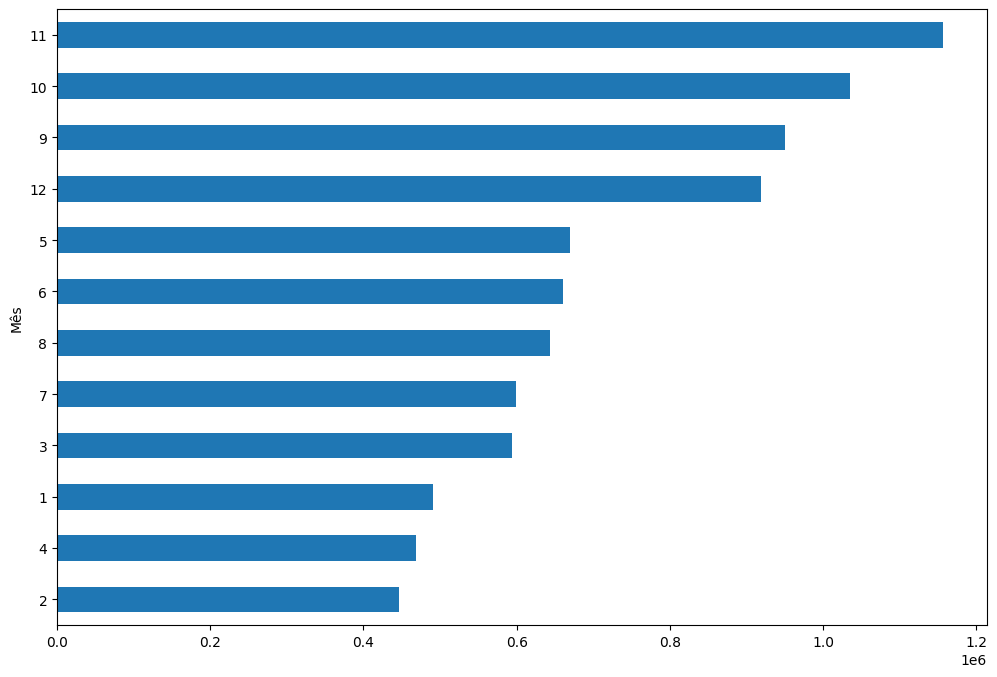

In [ ]:
ax = vendas_mes.plot.barh(figsize=(12, 8))
ax.invert_yaxis()
ax.set_ylabel("Mês")
plt.show()

## Valor de venda total por mês e por país

In [ ]:
df_sem_outliers['Month'] = df_sem_outliers['InvoiceDate'].dt.month

vendas_mes_paistest = df_sem_outliers.groupby(['Country', 'Month'])['TotalPrice'].sum().sort_values(ascending=False)
display(vendas_mes_paistest)

Country         Month
United Kingdom  11       975251.390
                10       821220.130
                12       799389.560
                9        794806.692
                5        542216.600
                            ...    
Israel          10          132.180
Japan           9           112.080
Canada          8            51.560
Japan           3            48.900
Netherlands     7            26.020
Name: TotalPrice, Length: 271, dtype: float64

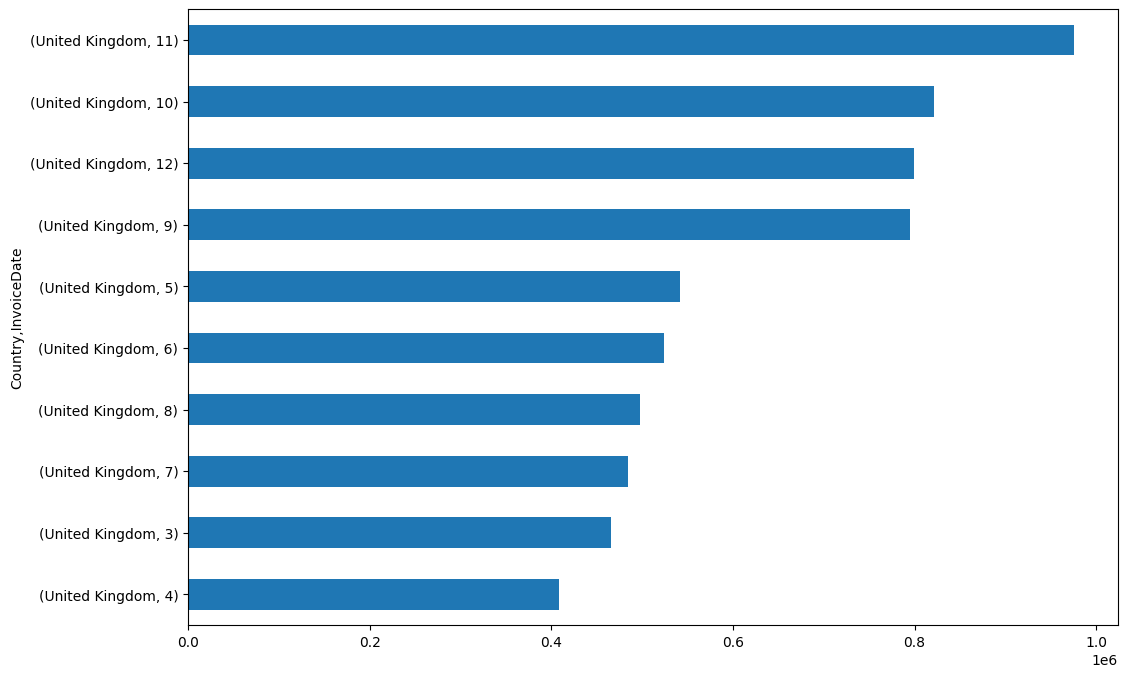

In [ ]:
#Aqui surgiu uma dúvida, tentei fazer de várias maneiras....Mas como o Reino Unido foi o país que mais vendeu disparado, o top 10 ficou só com ele.
#Eu não entendi direito se era pra ficar assim mesmo ou se era pra pegar o top 10 por mês de cada país, embora fosse ficar muito grande e também não consegui entender como fazer.
#Se for possível e se for esse o caso, desejo saber como fazer na correção, caso esteja errado o que eu fiz.

vendas_mes_pais = df_sem_outliers.groupby(['Country', df_sem_outliers['InvoiceDate'].dt.month])['TotalPrice'].sum().sort_values(ascending=False)
top10vendas_mes_pais = vendas_mes_pais.head(10)
ax = top10vendas_mes_pais.plot.barh(figsize=(12, 8))
ax.invert_yaxis()

# Cálculo do RFM


In [ ]:
#Pesquisei bastante para chegar nisso, espero estar correto. Vou deixar abaixo outras maneiras que tentei fazer, mas não davam certo, favor ignorar para a correção. Deixarei bem explícito.
#Tive que adicionar +1 na conta para fechar certinho a diferença de dias
rfm = df_sem_outliers.groupby('CustomerID').agg({'InvoiceDate': lambda x: (((data_final - x.max()).days) + 1), 'Quantity': 'sum',  'TotalPrice':'mean'})

In [ ]:
rfm.sort_values(by='InvoiceDate', ascending=True)

,InvoiceDate,Quantity,TotalPrice
CustomerID,,,
12662,1,2058,16.738174
15796,1,860,20.519773
14441,1,446,33.586078
14446,1,916,3.647473
13521,1,718,2.563947
...,...,...,...
13747,374,8,79.600000
16583,374,111,16.675000
17968,374,151,3.272840


                                                 FIM DO DESAFIO


---



